In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Read the CSV files
df = pd.read_csv("data.csv")
df.head()

,date,product_sku,price,store,is_promo_item,member_promo,quantity
0,11/29/2019,sku021,147454.56,storeA013,False,True,18.0
1,1/15/2020,sku022,4303058.84,storeA006,True,False,3.0
2,1/28/2020,sku023,1742713.52,storeA017,True,False,9.0
3,12/5/2019,sku024,4656476.03,storeA007,False,True,8.0
4,1/4/2020,sku025,4774574.30,storeA015,False,False,1.0


In [3]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
date             1954 non-null object
product_sku      1900 non-null object
price            1900 non-null float64
store            1959 non-null object
is_promo_item    1959 non-null object
member_promo     1907 non-null object
quantity         1959 non-null float64
dtypes: float64(2), object(5)
memory usage: 109.5+ KB


In [4]:
# Check total missing data
df.isnull().sum()

date              46
product_sku      100
price            100
store             41
is_promo_item     41
member_promo      93
quantity          41
dtype: int64

In [5]:
# Fill the null data with mean
df['quantity'].fillna(df['quantity'].mean(), inplace = True)
df['price'].fillna(df['price'].mean(), inplace = True)

In [6]:
# Check total missing data
df.isnull().sum()

date              46
product_sku      100
price              0
store             41
is_promo_item     41
member_promo      93
quantity           0
dtype: int64

In [7]:
# Convert to date time format
df['date'] = pd.to_datetime(df.date)
df = df.sort_values(by=['date'])
df.head()

,date,product_sku,price,store,is_promo_item,member_promo,quantity
203,2019-11-01,sku038,4030055.14,storeA023,False,False,4.0
1504,2019-11-01,sku029,545944.15,storeA009,True,True,19.0
417,2019-11-01,sku035,3487469.46,storeA015,True,False,10.0
729,2019-11-01,sku037,2279210.57,storeA015,True,True,7.0
792,2019-11-01,sku038,181585.04,storeA012,True,True,2.0


In [8]:
df['is_promo_item'] = df['is_promo_item'].fillna(method='ffill')
df['member_promo'] = df['member_promo'].fillna(method='ffill')

In [9]:
# Check total missing data
df.isnull().sum()

date              46
product_sku      100
price              0
store             41
is_promo_item      0
member_promo       0
quantity           0
dtype: int64

In [10]:
df['is_promo_item'] = df['is_promo_item'].astype(int)
df['member_promo'] = df['member_promo'].astype(int)
df.head()

,date,product_sku,price,store,is_promo_item,member_promo,quantity
203,2019-11-01,sku038,4030055.14,storeA023,0,0,4.0
1504,2019-11-01,sku029,545944.15,storeA009,1,1,19.0
417,2019-11-01,sku035,3487469.46,storeA015,1,0,10.0
729,2019-11-01,sku037,2279210.57,storeA015,1,1,7.0
792,2019-11-01,sku038,181585.04,storeA012,1,1,2.0


In [11]:
# Check total missing data
df.isnull().sum()

date              46
product_sku      100
price              0
store             41
is_promo_item      0
member_promo       0
quantity           0
dtype: int64

In [12]:
data_temp1 = df['product_sku']
data_temp2 = df['price']

print(len(data_temp1))
print(len(data_temp2))

avg = df['price'].mean()

candidate_sku = []

for i in range(len(data_temp1)):
    if data_temp2[i]+500 > avg and data_temp2[i]-500 < avg:
        candidate_sku.append(data_temp1[i])
        
print(candidate_sku)

2000
2000
[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 'sku047', nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [13]:
# Fill with the candidate
df['product_sku'] = df['product_sku'].fillna('sku047') 

In [14]:
# Check total missing data
df.isnull().sum()

date             46
product_sku       0
price             0
store            41
is_promo_item     0
member_promo      0
quantity          0
dtype: int64

In [15]:
# Handle the missing store
data_temp1 = df['product_sku']
data_temp2 = df['quantity']
data_temp3 = df['store']

print(len(data_temp1))
print(len(data_temp2))

temp = []

def isNaN(string):
    return string != string

for i in range(len(data_temp1)):
    if isNaN(data_temp3[i]):
        cond = True
        for j in range(len(data_temp1)):
            if data_temp1[i] == data_temp1[j] and data_temp2[i] == data_temp2[j]:
                if cond:
                    temp.append(data_temp3[i])
                    cond = False
    else:
        temp.append(data_temp3[i])
        
print(len(temp))

2000
2000
2000


In [16]:
df = df.dropna()

In [17]:
# Check total missing data
df.isnull().sum()

date             0
product_sku      0
price            0
store            0
is_promo_item    0
member_promo     0
quantity         0
dtype: int64

In [18]:
df.shape

(1914, 7)

In [19]:
df=pd.concat([df,pd.get_dummies(df['store'],prefix='store')],axis=1).drop(['store'],axis=1)

In [ ]:
df=pd.concat([df,pd.get_dummies(df['product_sku'],prefix='product_sku')],axis=1).drop(['product_sku'],axis=1)

In [20]:
df.shape

(1914, 34)

In [21]:
# Split testing and training
X = df.drop(columns=['quantity', 'date', 'product_sku']) # , axis = 1
y = df['quantity']

In [22]:
# Split training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [23]:
# Adding Grid Search CV 2
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [300, 1000]
}

In [24]:
# Train the model
clf = RandomForestRegressor()
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  96 out of  96 | elapsed:   18.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [25]:
best_acc = grid_search.best_score_
best_param = grid_search.best_params_
print("best_acc = ", best_acc)
print("best_param = ", best_param)

best_acc =  -0.03351207189091099
best_param =  {'max_depth': 90, 'min_samples_split': 12, 'bootstrap': True, 'n_estimators': 300, 'min_samples_leaf': 5, 'max_features': 2}


In [26]:
clf = RandomForestRegressor(n_estimators = 1000,  verbose=1, bootstrap = True, max_depth = 90, max_features = 3, min_samples_leaf = 3, min_samples_split=8)
clf.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    1.1s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=90, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

In [27]:
predicted = clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


In [28]:
predicted.reshape(-1,1)

array([[ 8.45904078],
       [ 9.79489193],
       [ 9.80027337],
       [10.49628577],
       [15.34865004],
       [ 8.11589845],
       [11.0238651 ],
       [11.86457295],
       [ 8.6003725 ],
       [ 9.42466169],
       [11.93077773],
       [10.23507628],
       [ 8.96578947],
       [12.90533221],
       [ 9.06185457],
       [ 9.4094565 ],
       [ 9.01412903],
       [11.05833327],
       [13.76937555],
       [10.18152864],
       [11.39652639],
       [10.98074208],
       [10.42807844],
       [12.71310565],
       [ 9.55172987],
       [ 8.59092759],
       [10.61842755],
       [ 9.95386132],
       [11.36416822],
       [ 7.15800276],
       [10.61640757],
       [11.91567191],
       [10.57573463],
       [12.22245348],
       [13.64711809],
       [14.18845705],
       [11.13949381],
       [ 9.08646269],
       [11.29536088],
       [ 9.66640419],
       [ 8.55965348],
       [ 9.04289628],
       [ 9.70349948],
       [ 7.20315998],
       [ 9.759209  ],
       [12

In [29]:
compare = np.concatenate((predicted.reshape(len(predicted), 1), y_test.values.reshape(len(y_test), 1)), 1)

In [30]:
def calculate_error(test_y, predicted):
    return mean_absolute_error(test_y, predicted)

error = calculate_error(y_test, predicted)

print("error = ", error)

error =  4.973012724190936


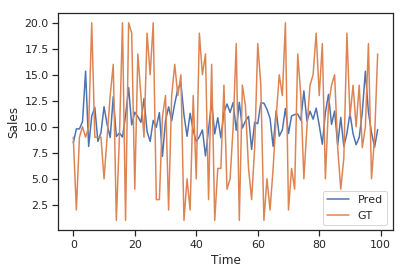

In [31]:
pred = predicted[:100]
gt = y_test[:100]
plt.plot(range(len(pred)), pred, label = 'Pred')
plt.plot(range(len(gt)), gt, label = 'GT')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.show()

In [32]:
def calculate_error(test_y, predicted):
    return mean_absolute_error(test_y, predicted)

error = calculate_error(y_test, predicted)

print("error = ", error)

error =  4.973012724190936


In [33]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predicted)

print("r2 = ", r2)

r2 =  -0.05825556879905913
